# Cowley short range order parameter

The [Cowley short range order parameter](https://doi.org/10.1103/PhysRev.77.669) can be used to find if an alloy is ordered or not. The order parameter is given by,

$$
\alpha_i = 1 - \frac{n_i}{m_A c_i}
$$

where $n_i$ is the number of atoms of the non reference type among the $c_i$ atoms
in the $i$th shell. $m_A$ is the concentration of the non reference atom.

We can start by importing the necessary modules

In [1]:
import pyscal as pc
import pyscal.crystal_structures as pcs
import matplotlib.pyplot as plt

We need a binary alloy structure to calculate the order parameter. We will use the crystal structures modules to do this. Here, we will create a L12 structure.

In [2]:
atoms, box = pcs.make_crystal('l12', lattice_constant=4.00, repetitions=[2,2,2])

In order to use the order parameter, we need to have two shells of neighbors around the atom. In order to get two shells of neighbors, we will first estimate a cutoff using the radial distribution function.

In [4]:
sys = pc.System()
sys.box = box
sys.atoms = atoms

In [5]:
val, dist = sys.calculate_rdf()

We can plot the rdf,

(0.0, 5.0)

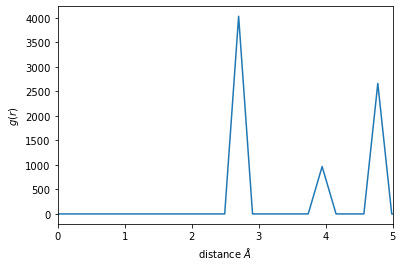

In [7]:
plt.plot(dist, val)
plt.xlabel(r"distance $\AA$")
plt.ylabel(r"$g(r)$")
plt.xlim(0, 5)

In this case, a cutoff of about 4.5 will make sure that two shells are included. Now the neighbors are calculated using this cutoff.

In [8]:
sys.find_neighbors(method='cutoff', cutoff=4.5)

Finally we can calculate the short range order. We will use the reference type as 1 and also specify the average keyword as True. This will allow us to get an average value for the whole simulation box.

In [9]:
sys.calculate_sro(reference_type=1, average=True)

array([-0.33333333,  1.        ])

Value for individual atoms can be accessed by,

In [10]:
atoms = sys.atoms

In [11]:
atoms[4].sro

[-0.33333333333333326, 1.0]

Only atoms of the non reference type will have this value!